# **Kannada-MNIST-Classification-with-Deep-Learning**

------------------
The MNIST dataset is a widely used dataset in the field of machine learning and computer vision. It consists of a large collection of 28x28 grayscale images of handwritten digits (0-9). The dataset is commonly used as a benchmark for developing and evaluating algorithms in image classification tasks. The MNIST dataset is often used as a starting point for learning and experimenting with image classification algorithms and deep learning models. It provides a relatively simple and well-defined task, making it easier to understand and evaluate the performance of different approaches.

------------------
## **Objective:**
-----------------
The goal is to train a deep learning model to classify these handwritten digits accurately

### Installing all dependecies

In [27]:
!pip install argparse
!pip install numpy
!pip install opencv-python==4.5.1.48
!pip install keras==2.2.4
!pip install Keras-preprocessing==1.0.5
!pip install TensorFlow==1.12
!pip install Pillow==5.1.0
!pip install Matplotlib==2.2.2
!pip install scikit-learn==0.19.1
!pip install mlxtend==0.14.0
!pip install tqdm
!pip install seaborn
!pip install kaggle
!pip install opendatasets

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


### Importing the necessary libraries

In [2]:
# System
import sys
import os
import argparse
import itertools

# Time
import time
import datetime

# Numerical Data
import random
import numpy as np 
import pandas as pd

# Tools
import shutil
from glob import glob
from tqdm import tqdm
import gc

# NLP
import re

# Preprocessing
from sklearn import preprocessing
from sklearn.utils import class_weight as cw
from sklearn.utils import shuffle

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn import svm
from sklearn.svm import LinearSVC, SVC

# Evaluation Metrics
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score


# Deep Learning - Keras -  Preprocessing
from keras.preprocessing.image import ImageDataGenerator

# Deep Learning - Keras - Model
import keras
from keras import models
from keras.models import Model
from keras.models import load_model
from keras.models import Sequential

# Deep Learning - Keras - Layers
from keras.layers import Convolution1D, concatenate, SpatialDropout1D, GlobalMaxPool1D, GlobalAvgPool1D, Embedding, \
    Conv2D, SeparableConv1D, Add, BatchNormalization, Activation, GlobalAveragePooling2D, LeakyReLU, Flatten
from keras.layers import Dense, Input, Dropout, MaxPool2D, MaxPooling2D, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, \
    Lambda, Multiply, LSTM, Bidirectional, PReLU, MaxPooling1D
from keras.layers.pooling import _GlobalPooling1D

from keras.regularizers import l2

# Deep Learning - Keras - Pretrained Models
from keras.applications.xception import Xception
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.densenet import DenseNet201
from keras.applications.nasnet import NASNetMobile, NASNetLarge

from keras.applications.nasnet import preprocess_input

# Deep Learning - Keras - Model Parameters and Evaluation Metrics
from keras import optimizers
from keras.optimizers import Adam, SGD , RMSprop
from keras.losses import mae, sparse_categorical_crossentropy, binary_crossentropy

# Deep Learning - Keras - Visualisation
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau, LearningRateScheduler
# from keras.wrappers.scikit_learn import KerasClassifier
from keras import backend as K

# Deep Learning - TensorFlow
import tensorflow as tf

# Graph/ Visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.image as mpimg
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix

# Image
from PIL import Image
from IPython.display import display

# np.random.seed(42)

%matplotlib inline

# Input data
#print(os.listdir("../input/"))
import os
import opendatasets as od
import pandas

Using TensorFlow backend.
C:\Users\isabe\anaconda\envs\py367\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\isabe\anaconda\envs\py367\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\isabe\anaconda\envs\py367\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\isabe\anaconda\envs\py367\lib\site-packag

### Reading the dataset

We will download the dataset from kaggle from https://www.kaggle.com/competitions/Kannada-MNIST. Make sure you login to kaggle account and downloaded the kaggle.json file from settings page.

Note:- The kaggle.json file need to be present in the same folder where the the notebook points to.

In [3]:
od.download("https://www.kaggle.com/competitions/Kannada-MNIST")

Skipping, found downloaded files in ".\Kannada-MNIST" (use force=True to force download)


In [4]:
download_path = os.path.abspath('Kannada-MNIST')

In [5]:
input_directory = download_path+r"/input/"
output_directory = download_path+r"/output/"

training_dir = input_directory + "train_images"
testing_dir = input_directory + r"test_images"

if not os.path.exists(output_directory):
    os.mkdir(output_directory)
    
figure_directory = "../output/figures"
if not os.path.exists(figure_directory):
    os.mkdir(figure_directory)

model_output_directory = "../output/models/"
if not os.path.exists(model_output_directory):
    os.mkdir(model_output_directory)

file_name_pred_batch = figure_directory+r"/result"
file_name_pred_sample = figure_directory+r"/sample"

### Functions

In [6]:
def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:    
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:  
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:  
        return 'Date today: %s' % datetime.date.today()  

### Overview of the datset 

In [7]:
train_df = pd.read_csv(input_directory + "train.csv")
train_df.rename(index=str, columns={"label": "target"}, inplace=True)
train_df.head()

,target,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test_df = pd.read_csv(input_directory + "test.csv")
test_df.rename(index=str, columns={"label": "target"}, inplace=True)
test_df.head()

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


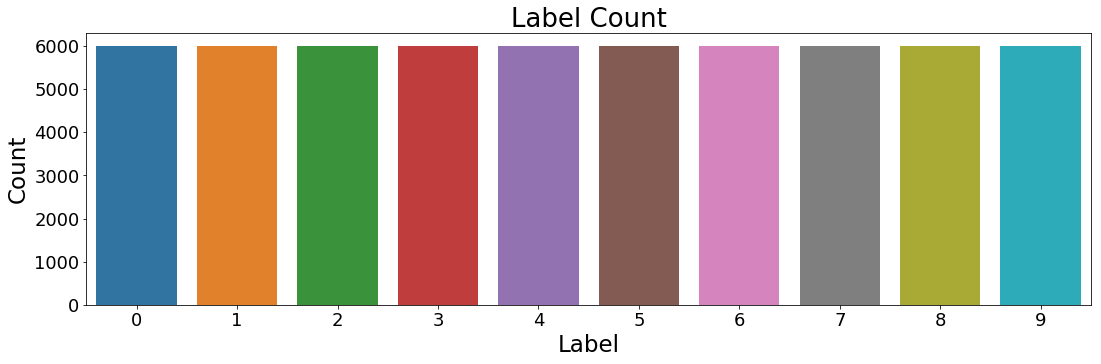

In [9]:
ticksize = 18
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 5)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

col = "target"
xlabel = "Label"
ylabel = "Count"

sns.countplot(x=train_df[col])
plt.title("Label Count")
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

### Preprocessing

In [10]:
def get_data(train_X=None, train_Y=None, test_X=None, batch_size=32):
    print("Preprocessing and Generating Data Batches.......\n")
    
    rescale = 1.0/255

    train_batch_size = batch_size
    validation_batch_size = batch_size*5
    test_batch_size = batch_size*5
    
    train_shuffle = True
    val_shuffle = True
    test_shuffle = False
    
    train_datagen = ImageDataGenerator(
        horizontal_flip=False,
        vertical_flip=False,
        rotation_range=10,
#         shear_range=15,
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,
        rescale=rescale,
        validation_split=0.25)

    
    train_generator = train_datagen.flow(
        x=train_X, 
        y=train_Y, 
        batch_size=batch_size,
        shuffle=True, 
        sample_weight=None, 
        seed=42, 
        save_to_dir=None, 
        save_prefix='', 
        save_format='png', 
        subset='training')
    
    
    validation_generator = train_datagen.flow(
        x=train_X, 
        y=train_Y, 
        batch_size=validation_batch_size,
        shuffle=True, 
        sample_weight=None, 
        seed=42, 
        save_to_dir=None, 
        save_prefix='', 
        save_format='png', 
        subset='validation')
    
    test_datagen = ImageDataGenerator(rescale=rescale)
    
    test_generator = test_datagen.flow(
        x=test_X, 
        y=None,  
        batch_size=test_batch_size,
        shuffle=False, 
        sample_weight=None, 
        seed=42, 
        save_to_dir=None, 
        save_prefix='', 
        save_format='png')
    
    class_weights = get_weight(np.argmax(train_Y, axis=1))
    
    steps_per_epoch = len(train_generator)
    validation_steps = len(validation_generator)
    
    print("\nPreprocessing and Data Batch Generation Completed.\n")
    
    
    return train_generator, validation_generator, test_generator, class_weights, steps_per_epoch, validation_steps
            
# Calculate Class Weights
def get_weight(y):
    class_weight_current =  cw.compute_class_weight('balanced', np.unique(y), y)
    return class_weight_current

### Model Functions

In [11]:
def get_model(model_name, input_shape=(96, 96, 3), num_class=2, weights='imagenet', dense_units=1024, internet=False):
    inputs = Input(input_shape)
    
    if model_name == "Xception":
        base_model = Xception(include_top=False, weights=weights, input_shape=input_shape)
    elif model_name == "ResNet50":
        base_model = ResNet50(include_top=False, weights=weights, input_shape=input_shape)
    elif model_name == "ResNet101":
        base_model = keras.applications.resnet.ResNet101(include_top=False, weights=weights, input_shape=input_shape)
    elif model_name == "ResNet152":
        base_model = keras.applications.resnet.ResNet152(include_top=False, weights=weights, input_shape=input_shape)
    elif model_name == "ResNet50V2":
        base_model = resnet_v2.ResNet50V2(include_top=False, weights=weights, input_shape=input_shape)
    elif model_name == "ResNet101V2":
        base_model = resnet_v2.ResNet101V2(include_top=False, weights=weights, input_shape=input_shape)
    elif model_name == "ResNet152V2":
        base_model = resnet_v2.ResNet152V2(include_top=False, weights=weights, input_shape=input_shape)
    elif model_name == "ResNeXt50":
        base_model = resnext.ResNeXt50(include_top=False, weights=weights, input_shape=input_shape)
    elif model_name == "ResNeXt101":
        base_model = resnext.ResNeXt101(include_top=False, weights=weights, input_shape=input_shape)
    elif model_name == "InceptionV3":
        base_model = InceptionV3(include_top=False, weights=weights, input_shape=input_shape)
    elif model_name == "InceptionResNetV2":
        base_model = InceptionResNetV2(include_top=False, weights=weights, input_shape=input_shape)
    elif model_name == "DenseNet201":
        base_model = DenseNet201(include_top=False, weights=weights, input_shape=input_shape)
    elif model_name == "NASNetMobile":
        base_model = NASNetMobile(include_top=False, weights=weights, input_shape=input_shape)
    elif model_name == "NASNetLarge":
        base_model = NASNetLarge(include_top=False, weights=weights, input_shape=input_shape)

    
    x = base_model.output
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    
    x = Dense(dense_units)(x)
    x = BatchNormalization()(x)
    x = Activation(activation='relu')(x)
    x = Dropout(0.5)(x)
    
    if num_class>1:
        outputs = Dense(num_class, activation="softmax")(x)
    else:
        outputs = Dense(1, activation="sigmoid")(x)

    model = Model(inputs=base_model.input, outputs=outputs)
    
    model.summary()
    
    
    return model


def get_conv_model(num_class=2, input_shape=None, dense_units=256):
    model = Sequential()

    model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation ='relu', input_shape = input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation ='relu', kernel_regularizer=l2(1e-4)))
    model.add(BatchNormalization())
    
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu', kernel_regularizer=l2(1e-4)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu', kernel_regularizer=l2(1e-4)))
    model.add(BatchNormalization())
    
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))

    
    model.add(Flatten())
    model.add(Dense(dense_units, activation = "relu"))
    model.add(Dropout(0.5))
    
    
    if num_class>1:
        model.add(Dense(num_class, activation='softmax'))
    else:
        model.add(Dense(num_class, activation='sigmoid'))
    
    print(model.summary())

    return model

### Output Configuration

In [12]:
main_model_dir = output_directory + r"models_output/"
main_log_dir = output_directory + r"logs/"

try:
    os.mkdir(main_model_dir)
except:
    print("Could not create main model directory")
    
try:
    os.mkdir(main_log_dir)
except:
    print("Could not create main log directory")



model_dir = main_model_dir + time.strftime('%Y-%m-%d %H-%M-%S') + "/"
log_dir = main_log_dir + time.strftime('%Y-%m-%d %H-%M-%S')


try:
    os.mkdir(model_dir)
except:
    print("Could not create model directory")
    
try:
    os.mkdir(log_dir)
except:
    print("Could not create log directory")
    
model_file = model_dir + "{epoch:02d}-val_acc-{val_acc:.2f}-val_loss-{val_loss:.2f}.hdf5"

Could not create main model directory
Could not create main log directory


In [13]:
print("Settting Callbacks")

def step_decay(epoch, lr):
    # initial_lrate = 1.0 # no longer needed
    lrate = lr
    if epoch==2:
        lrate = 0.0001  
#     lrate = lr * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate


checkpoint = ModelCheckpoint(
    model_file, 
    monitor='val_acc', 
    save_best_only=True)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True)


reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.6,
    patience=2,
    min_lr=0.0000001,
    verbose=1)

learning_rate_scheduler = LearningRateScheduler(step_decay, verbose=1)
# f1_metrics = Metrics()


callbacks = [reduce_lr, early_stopping]
# callbacks = [checkpoint, reduce_lr, early_stopping]
# callbacks = [reduce_lr, early_stopping, f1_metrics]

print("Set Callbacks at ", date_time(1))

Settting Callbacks
Set Callbacks at  Timestamp: 2023-06-08 23:08:39


### Model

In [14]:
print("Getting Base Model", date_time(1))

# model_name="InceptionV3"
# model_name="NASNetMobile"

dim = 28

input_shape = (dim, dim, 1)


num_class = len(set(train_df["target"].values))

weights = 'imagenet'
dense_units = 256

internet = True

# model = get_model(model_name=model_name, 
#                   input_shape=input_shape, 
#                   num_class=num_class, 
#                   weights=weights, 
#                   dense_units=dense_units, 
#                   internet=internet)

model = get_conv_model(num_class=num_class, input_shape=input_shape, dense_units=dense_units)
print("Loaded Base Model", date_time(1))

Getting Base Model Timestamp: 2023-06-08 23:08:39
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)         

In [15]:
loss = 'categorical_crossentropy'
# loss = 'binary_crossentropy'
metrics = ['accuracy']
# metrics = [auroc]

In [16]:
train_X = train_df.drop(columns=["target"]).values
train_X = train_X.reshape(train_X.shape[0], dim, dim,1)

train_Y = train_df["target"].values
train_Y = keras.utils.to_categorical(train_Y, 10) 

test_X = test_df.drop(columns=["id"]).values
test_X = test_X.reshape(test_X.shape[0], dim, dim,1)

In [17]:
batch_size = 128

# class_mode = "categorical"
# class_mode = "binary"

# target_size = (dim, dim)

train_generator, validation_generator, test_generator, class_weights, steps_per_epoch, validation_steps = get_data(train_X=train_X, train_Y=train_Y, test_X=test_X, batch_size=batch_size)


Preprocessing and Generating Data Batches.......


Preprocessing and Data Batch Generation Completed.



### Training

In [18]:
print("Starting Trainning ...\n")

start_time = time.time()
print(date_time(1))

# batch_size = 32
# train_generator, validation_generator, test_generator, class_weights, steps_per_epoch, validation_steps = get_data(batch_size=batch_size)

print("\n\nCompliling Model ...\n")
learning_rate = 0.001
optimizer = Adam(learning_rate)
# optimizer = Adam()

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

verbose = 1
epochs = 50

print("Trainning Model ...\n")
history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    verbose=verbose,
    callbacks=callbacks,
    validation_data=validation_generator,
    validation_steps=validation_steps, 
    class_weight=class_weights)

elapsed_time = time.time() - start_time
elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

print("\nElapsed Time: " + elapsed_time)
print("Completed Model Trainning", date_time(1))

Starting Trainning ...

Timestamp: 2023-06-08 23:08:39


Compliling Model ...

Trainning Model ...

Epoch 1/50
352/352 [==============================] - 186s 527ms/step - loss: 0.3671 - acc: 0.8924 - val_loss: 0.1629 - val_acc: 0.9596
Epoch 2/50
352/352 [==============================] - 167s 475ms/step - loss: 0.0957 - acc: 0.9749 - val_loss: 0.1226 - val_acc: 0.9744
Epoch 3/50
352/352 [==============================] - 167s 474ms/step - loss: 0.0773 - acc: 0.9813 - val_loss: 0.1206 - val_acc: 0.9732
Epoch 4/50
352/352 [==============================] - 167s 473ms/step - loss: 0.0669 - acc: 0.9851 - val_loss: 0.1532 - val_acc: 0.9713
Epoch 5/50
352/352 [==============================] - 468s 1s/step - loss: 0.0661 - acc: 0.9846 - val_loss: 0.0971 - val_acc: 0.9807
Epoch 6/50
352/352 [==============================] - 166s 473ms/step - loss: 0.0580 - acc: 0.9875 - val_loss: 0.0989 - val_acc: 0.9797
Epoch 7/50
352/352 [==============================] - 166s 472ms/step - loss: 0.0568 - 

### Evaluating the performace of the model
Model Performance  Visualization over the Epochs

In [19]:
def plot_performance(history=None, figure_directory=None):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    ylim_pad = [0.005, 0.005]
    ylim_pad = [0, 0]


    plt.figure(figsize=(20, 5))

    # Plot training & validation Accuracy values

    y1 = history.history['acc']
    y2 = history.history['val_acc']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]
    
#     min_y = .96
#     max_y = 1


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()


    # Plot training & validation loss values

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]

#     min_y = .1
#     max_y = 0

    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()

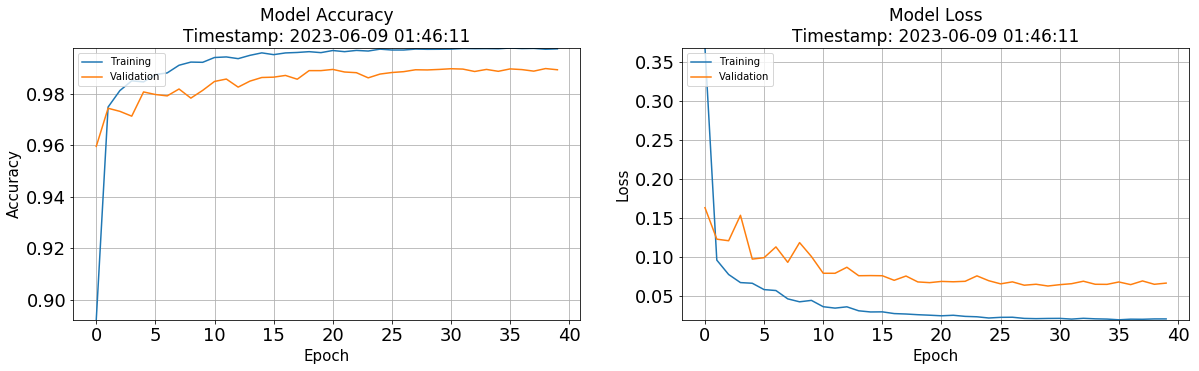

In [20]:
plot_performance(history=history)

In [21]:
ypreds = model.predict_generator(generator=test_generator, steps = len(test_generator),  verbose=1)
# ypreds

8/8 [==============================] - 5s 631ms/step


In [22]:
# ypred = ypreds[:,1]#
ypred = np.argmax(ypreds, axis=1)

In [23]:
sample_df = pd.read_csv(input_directory+"sample_submission.csv")
sample_df.head()

,id,label
0,0,5
1,1,5
2,2,5
3,3,5
4,4,5


In [24]:
test_gen_id = test_generator.index_array
sample_submission_id = sample_df["id"]

len(test_gen_id), len(sample_submission_id)

(5000, 5000)

In [25]:
sample_list = list(sample_df.id)

pred_dict = dict((key, value) for (key, value) in zip(test_generator.index_array, ypred))

pred_list_new = [pred_dict[f] for f in sample_list]

test_df = pd.DataFrame({'id': sample_list,'label': pred_list_new})

test_df.to_csv('submission.csv', header=True, index=False)

In [26]:
test_df.head()

,id,label
0,0,3
1,1,0
2,2,2
3,3,6
4,4,7
